In [1]:
library(data.table)
library(ggplot2)
theme_set(theme_bw())

In [2]:
setwd('~/Desktop/bacterial_dating_aerobic_predictor')

In [17]:
# Read cv probabities of the 4-class predictions
system('ls -d data/*.cv_data/*csv |grep -v new_class > data/cv_data_files.txt')
files = fread('data/cv_data_files.txt', header=F)
d1 = files[grep('Perceptron', invert = T, V1),fread(input=V1, header=T, sep='\t', colClasses=list(double='y_actual')), by=V1]
setnames(d1, 'probability_0', 'prob_mesophilic')
setnames(d1, 'probability_1', 'prob_hyperthermophilic')
setnames(d1, 'probability_2', 'prob_thermophilic')
setnames(d1, 'probability_3', 'prob_psychrophilic')
d2 = files[grep('Perceptron', V1),fread(input=V1, header=T, sep='\t', colClasses=list(double=c('y_actual','false_negative_rate','false_positive_rate'))), by=V1]

In [4]:
d2[, prob_mesophilic := -1]
d2[, prob_hyperthermophilic := -1]
d2[, prob_thermophilic := -1]
d2[, prob_psychrophilic := -1]
d = rbind(d1, d2)
dim(d)
d[1:3]

[1] 648288     11

V1,prob_mesophilic,prob_hyperthermophilic,prob_thermophilic,prob_psychrophilic,prediction,accession,y_actual,false_negative_rate,false_positive_rate,predictor
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_AdaBoostClassifier_0.csv,0.2904010,0.1580269,0.2745697,0.2770024,0,GB_GCA_000214705.1,2,0,0.0,AdaBoostClassifier
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_AdaBoostClassifier_0.csv,0.2904010,0.1580269,0.2745697,0.2770024,0,GB_GCA_000214705.1,2,0,0.1,AdaBoostClassifier
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_AdaBoostClassifier_0.csv,0.2848898,0.1713196,0.2796984,0.2640923,0,GB_GCA_000214705.1,2,0,0.2,AdaBoostClassifier


In [5]:
d[, dataset := gsub('data/(.+).csv.cv_data/.*', '\\1', V1)]
d[1:3]

V1,prob_mesophilic,prob_hyperthermophilic,prob_thermophilic,prob_psychrophilic,prediction,accession,y_actual,false_negative_rate,false_positive_rate,predictor,dataset
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_AdaBoostClassifier_0.csv,0.2904010,0.1580269,0.2745697,0.2770024,0,GB_GCA_000214705.1,2,0,0.0,AdaBoostClassifier,bacdive_scape_20230315.json.parsed.temperature.with_cyanos
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_AdaBoostClassifier_0.csv,0.2904010,0.1580269,0.2745697,0.2770024,0,GB_GCA_000214705.1,2,0,0.1,AdaBoostClassifier,bacdive_scape_20230315.json.parsed.temperature.with_cyanos
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_AdaBoostClassifier_0.csv,0.2848898,0.1713196,0.2796984,0.2640923,0,GB_GCA_000214705.1,2,0,0.2,AdaBoostClassifier,bacdive_scape_20230315.json.parsed.temperature.with_cyanos


In [6]:
# bacdive_scrape_20230315.json.parsed.anaerobe_vs_rest.with_cyanos.csv
# bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.csv
# bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv
# bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_set_aerobic.csv
# bacdive_scrape_20230315.json.parsed.anaerobe_vs_rest.with_cyanos.apply_respiration_gene_exclusion.csv
# bacdive_scrape_20230315.json.parsed.anaerobe_vs_rest.with_cyanos.apply_respiration_gene_set_aerobic.csv
d[dataset == 'bacdive_scape_20230315.json.parsed.temperature.with_cyanos', dataset2 := '1=temperature-prediction']
data.table(table(d$dataset2))
d[1:3]

V1,N
<chr>,<int>
1=temperature-prediction,648288


V1,prob_mesophilic,prob_hyperthermophilic,prob_thermophilic,prob_psychrophilic,prediction,accession,y_actual,false_negative_rate,false_positive_rate,predictor,dataset,dataset2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_AdaBoostClassifier_0.csv,0.2904010,0.1580269,0.2745697,0.2770024,0,GB_GCA_000214705.1,2,0,0.0,AdaBoostClassifier,bacdive_scape_20230315.json.parsed.temperature.with_cyanos,1=temperature-prediction
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_AdaBoostClassifier_0.csv,0.2904010,0.1580269,0.2745697,0.2770024,0,GB_GCA_000214705.1,2,0,0.1,AdaBoostClassifier,bacdive_scape_20230315.json.parsed.temperature.with_cyanos,1=temperature-prediction
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_AdaBoostClassifier_0.csv,0.2848898,0.1713196,0.2796984,0.2640923,0,GB_GCA_000214705.1,2,0,0.2,AdaBoostClassifier,bacdive_scape_20230315.json.parsed.temperature.with_cyanos,1=temperature-prediction


In [7]:
d[, V1 := NULL]
d[, dataset := NULL]
setnames(d, 'dataset2', 'dataset')
d[1:3]

prob_mesophilic,prob_hyperthermophilic,prob_thermophilic,prob_psychrophilic,prediction,accession,y_actual,false_negative_rate,false_positive_rate,predictor,dataset
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.2904010,0.1580269,0.2745697,0.2770024,0,GB_GCA_000214705.1,2,0,0.0,AdaBoostClassifier,1=temperature-prediction
0.2904010,0.1580269,0.2745697,0.2770024,0,GB_GCA_000214705.1,2,0,0.1,AdaBoostClassifier,1=temperature-prediction
0.2848898,0.1713196,0.2796984,0.2640923,0,GB_GCA_000214705.1,2,0,0.2,AdaBoostClassifier,1=temperature-prediction


In [8]:
accuracies = d[grep('Isotonic',predictor,invert=T)][grep('Sigmoid',predictor,invert=T)][,.(
    tp = sum(prediction==1 & y_actual==1),
    tn = sum(prediction==0 & y_actual==0),
    fp = sum(prediction==1 & y_actual==0),
    fn = sum(prediction==0 & y_actual==1)
), by=list(predictor, false_negative_rate, false_positive_rate, dataset)]
accuracies[, accuracy := (tp+tn)/(tp+tn+fp+fn)]
accuracies[1:3]

predictor,false_negative_rate,false_positive_rate,dataset,tp,tn,fp,fn,accuracy
<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>
AdaBoostClassifier,0,0.0,1=temperature-prediction,26,1611,15,0,0.9909201
AdaBoostClassifier,0,0.1,1=temperature-prediction,26,1592,11,0,0.9932474
AdaBoostClassifier,0,0.2,1=temperature-prediction,25,1593,4,0,0.9975339


# Overall accuracies

In [9]:
overall_accuracies = accuracies[, .(accuracy_overall=mean(accuracy)*100), by=list(predictor)][order(-accuracy_overall)]
overall_accuracies

predictor,accuracy_overall
<chr>,<dbl>
XGBoost,99.84140
AdaBoostClassifier,99.75392
LogisticRegression,99.68885
GradientBoosting,99.67480
RandomForest,99.03004
ExtraTrees,99.01244
Perceptron,98.88070
GaussianNB,76.82151


# Plot accuracy with increasing removal of gene families (false negative rate)

In [10]:
dataset_names = sort(unique(d$dataset))
dataset_names

[1] "1=temperature-prediction"

In [11]:
# Order the predictors by accuracy
accuracies[, predictor := factor(predictor, levels=overall_accuracies$predictor)]

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


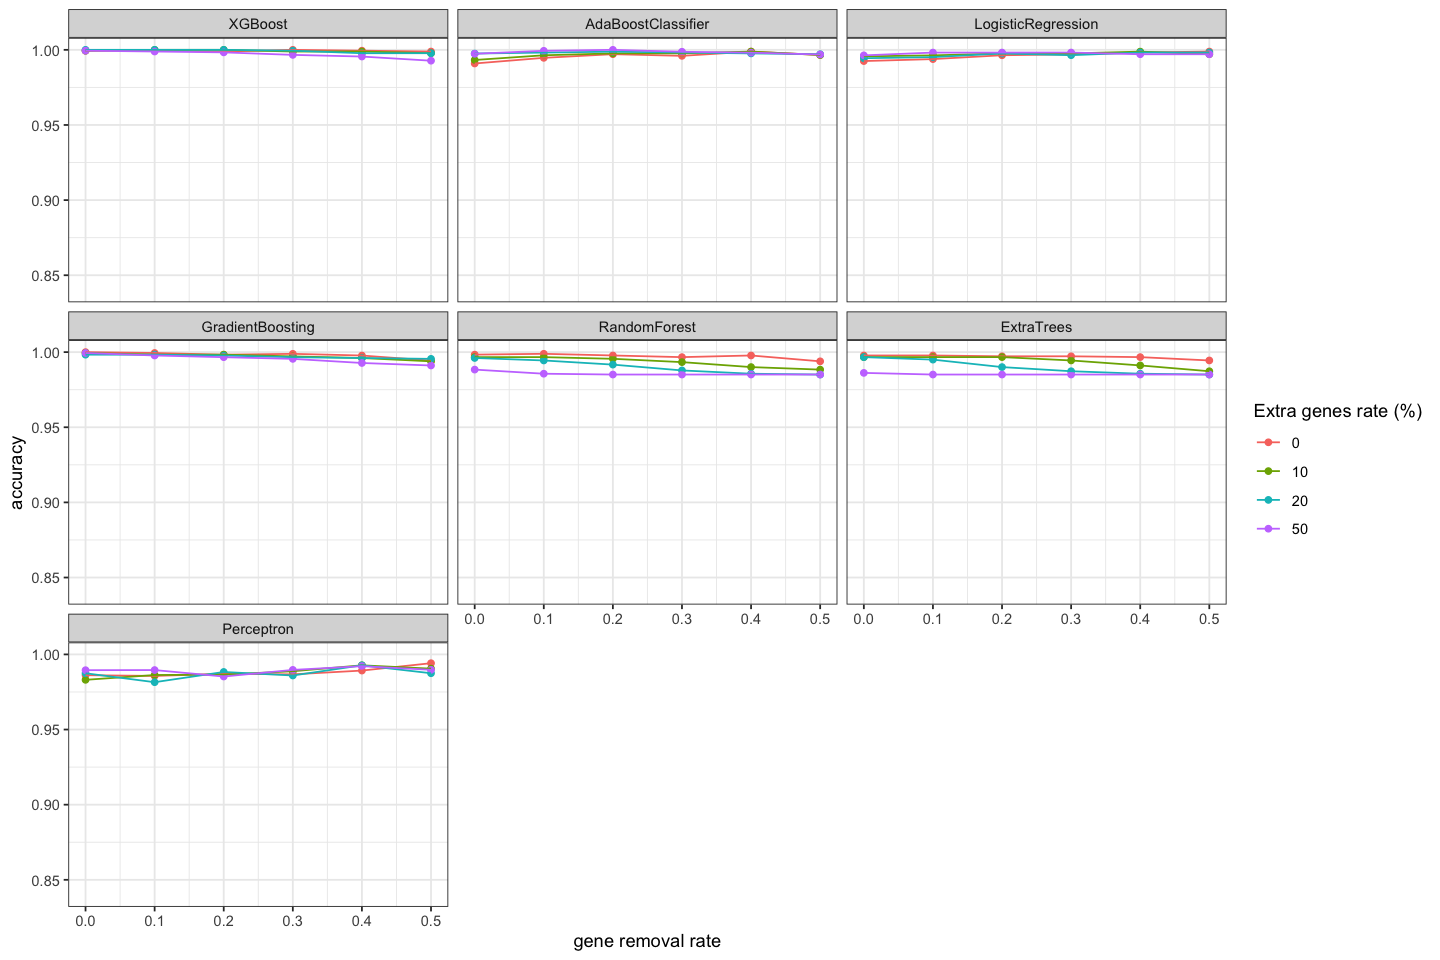

In [12]:
options(repr.plot.width=12, repr.plot.height=8)

qplot(data=accuracies[dataset=='1=temperature-prediction'][grep('Isotonic',predictor,invert=T)][grep('Sigmoid',predictor,invert=T)][grep('GaussianNB',predictor,invert=T)][false_positive_rate %in% c(0,0.1,0.2,0.5)], false_negative_rate, accuracy, ylim=c(0.84,1), xlab='gene removal rate', colour=factor(false_positive_rate*100))+geom_line()+facet_wrap(~predictor)+labs(colour='Extra genes rate (%)')

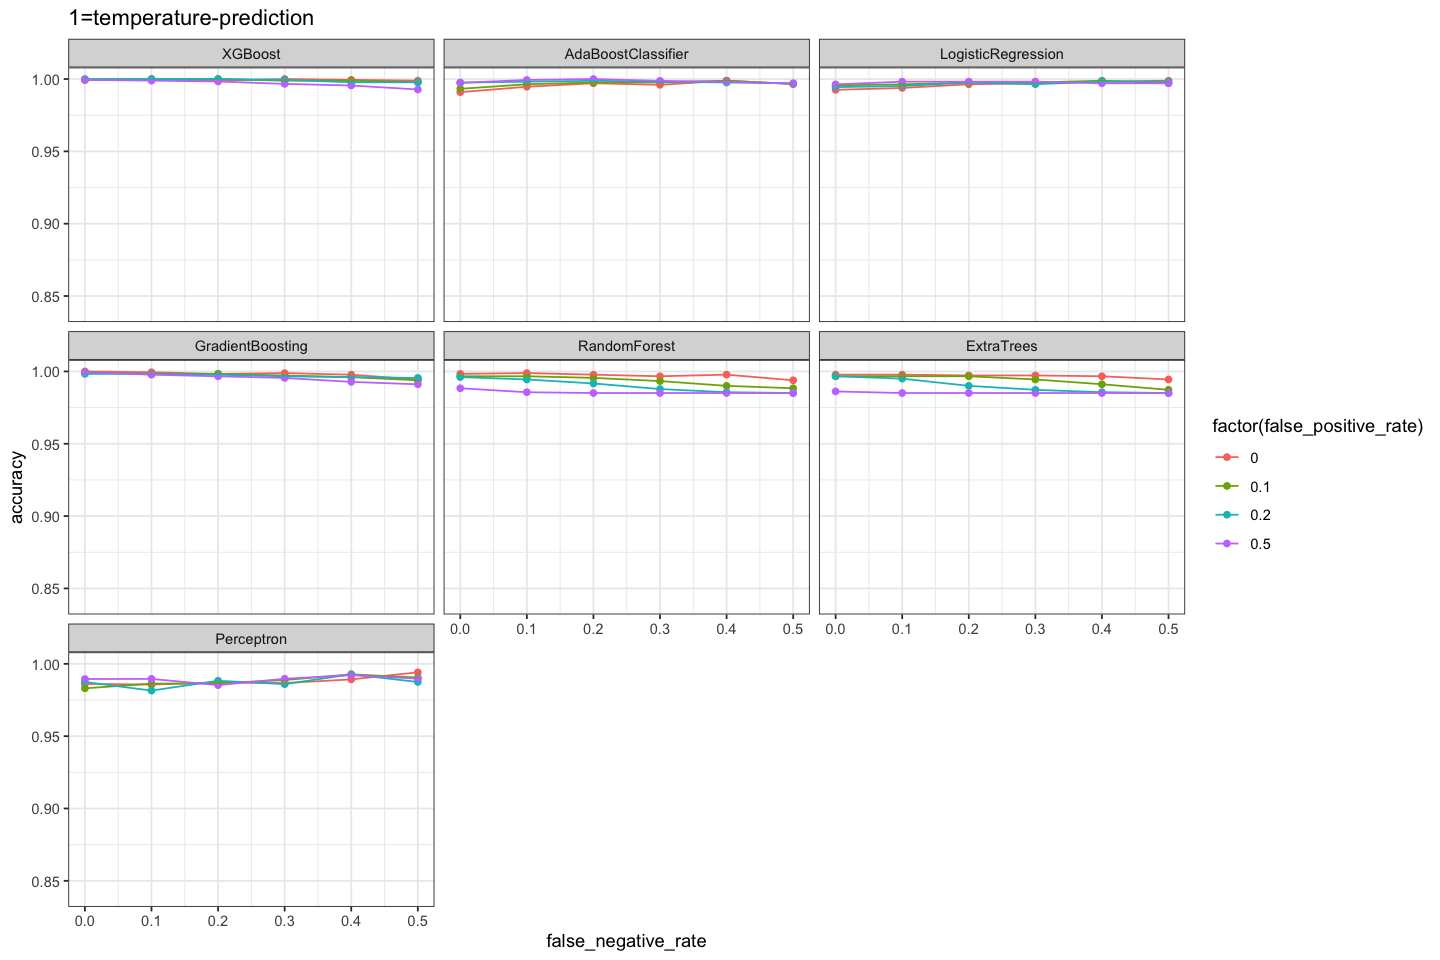

In [13]:
options(repr.plot.width=12, repr.plot.height=8)

for (dataset_name in dataset_names) {
    print(qplot(data=accuracies[dataset==dataset_name][grep('Isotonic',predictor,invert=T)][grep('Sigmoid',predictor,invert=T)][grep('GaussianNB',predictor,invert=T)][false_positive_rate %in% c(0,0.1,0.2,0.5)], false_negative_rate, accuracy, ylim=c(0.84,1), colour=factor(false_positive_rate), main=dataset_name)+geom_line()+facet_wrap(~predictor))
}


In [14]:
dcast(accuracies[grep('Isotonic',predictor,invert=T)][grep('Sigmoid',predictor,invert=T)], dataset~predictor, value.var='accuracy', fun.aggregate=mean)

#=> this data was put into a table in the spreadsheet for colouring

dataset,XGBoost,AdaBoostClassifier,LogisticRegression,GradientBoosting,RandomForest,ExtraTrees,Perceptron,GaussianNB
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1=temperature-prediction,0.998414,0.9975392,0.9968885,0.996748,0.9903004,0.9901244,0.988807,0.7682151


# Prediction probabilities change with calibration? TODO

In [ ]:
# d[false_positive_rate==0 & false_negative_rate==0][grep('XGBoost',predictor), .(accession,predictor, prob_aerobe)][accession=='GB_GCA_000252485.1']

In [ ]:
# qplot(data=d[grep('XGBoost',predictor)][false_positive_rate %in% c(0) & false_negative_rate %in% c(0,0.5)], prob_aerobe, geom='histogram', binwidth=0.05, )+facet_grid(predictor~false_negative_rate)

In [ ]:
# m = dcast(d[false_positive_rate==0 & false_negative_rate==0.5][grep('XGBoost',predictor), .(accession,predictor, prob_aerobe)], accession~predictor, value.var='prob_aerobe')
# m[1:3]
# qplot(data=m, XGBoost, XGBoost_Isotonic, alpha=I(1/10))

# Prediction as a 3-class problem works? UNDER CONSTRUCTION

In [18]:
# Read cv probabities of the 3-class predictions
system('ls -d data/*.cv_data/*csv |grep -v new_class > data/cv_data_files.txt')
files = fread('data/cv_data_files.txt', header=F)
d1 = files[grep('Perceptron', invert = T, V1),fread(input=V1, header=T, sep='\t', colClasses=list(double='y_actual')), by=V1]
d2 = files[grep('Perceptron', V1),fread(input=V1, header=T, sep='\t', colClasses=list(double=c('y_actual','false_negative_rate','false_positive_rate'))), by=V1]
d2[, prob_mesophilic := -1]
d2[, prob_hyperthermophilic := -1]
d2[, prob_thermophilic := -1]
d2[, prob_psychrophilic := -1]

# hack
d1 = files[grep('XGBoost', V1),fread(input=V1, header=T, sep='\t', colClasses=list(double='y_actual')), by=V1]
d = d1#rbind(d1, d2)
dim(d)
d[1:3]

[1] 81036    11

V1,probability_0,probability_1,probability_2,probability_3,prediction,accession,y_actual,false_negative_rate,false_positive_rate,predictor
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_XGBoost_0.csv,0.0001850547,4.898411e-06,0.9998007,9.273592e-06,2,GB_GCA_000214705.1,2,0,0.0,XGBoost
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_XGBoost_0.csv,0.0013213760,1.265682e-05,0.9985772,8.878633e-05,2,GB_GCA_000214705.1,2,0,0.1,XGBoost
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_XGBoost_0.csv,0.0001990330,2.967137e-06,0.9997938,4.140545e-06,2,GB_GCA_000214705.1,2,0,0.2,XGBoost


In [19]:
d[, dataset := gsub('data/(.+).csv.cv_data/.*', '\\1', V1)]
d[1:3]

V1,probability_0,probability_1,probability_2,probability_3,prediction,accession,y_actual,false_negative_rate,false_positive_rate,predictor,dataset
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_XGBoost_0.csv,0.0001850547,4.898411e-06,0.9998007,9.273592e-06,2,GB_GCA_000214705.1,2,0,0.0,XGBoost,bacdive_scape_20230315.json.parsed.temperature.with_cyanos
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_XGBoost_0.csv,0.0013213760,1.265682e-05,0.9985772,8.878633e-05,2,GB_GCA_000214705.1,2,0,0.1,XGBoost,bacdive_scape_20230315.json.parsed.temperature.with_cyanos
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_XGBoost_0.csv,0.0001990330,2.967137e-06,0.9997938,4.140545e-06,2,GB_GCA_000214705.1,2,0,0.2,XGBoost,bacdive_scape_20230315.json.parsed.temperature.with_cyanos


In [21]:
d[dataset == 'bacdive_scape_20230315.json.parsed.temperature.with_cyanos', dataset2 := '2=4_class_problem']
data.table(table(d$dataset2))
d[1:3]

V1,N
<chr>,<int>
2=4_class_problem,81036


V1,probability_0,probability_1,probability_2,probability_3,prediction,accession,y_actual,false_negative_rate,false_positive_rate,predictor,dataset,dataset2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_XGBoost_0.csv,0.0001850547,4.898411e-06,0.9998007,9.273592e-06,2,GB_GCA_000214705.1,2,0,0.0,XGBoost,bacdive_scape_20230315.json.parsed.temperature.with_cyanos,2=4_class_problem
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_XGBoost_0.csv,0.0013213760,1.265682e-05,0.9985772,8.878633e-05,2,GB_GCA_000214705.1,2,0,0.1,XGBoost,bacdive_scape_20230315.json.parsed.temperature.with_cyanos,2=4_class_problem
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.cv_data/prediction_probabilities_XGBoost_0.csv,0.0001990330,2.967137e-06,0.9997938,4.140545e-06,2,GB_GCA_000214705.1,2,0,0.2,XGBoost,bacdive_scape_20230315.json.parsed.temperature.with_cyanos,2=4_class_problem


In [22]:
d[, V1 := NULL]
d[, dataset := NULL]
setnames(d, 'dataset2', 'dataset')
d[1:3]

probability_0,probability_1,probability_2,probability_3,prediction,accession,y_actual,false_negative_rate,false_positive_rate,predictor,dataset
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0001850547,4.898411e-06,0.9998007,9.273592e-06,2,GB_GCA_000214705.1,2,0,0.0,XGBoost,2=4_class_problem
0.0013213760,1.265682e-05,0.9985772,8.878633e-05,2,GB_GCA_000214705.1,2,0,0.1,XGBoost,2=4_class_problem
0.0001990330,2.967137e-06,0.9997938,4.140545e-06,2,GB_GCA_000214705.1,2,0,0.2,XGBoost,2=4_class_problem


In [23]:
accuracies = d[grep('Isotonic',predictor,invert=T)][grep('Sigmoid',predictor,invert=T)][,.(accuracy= mean(prediction==y_actual)), by=list(predictor, false_negative_rate, false_positive_rate, dataset)]
accuracies[1:3]

predictor,false_negative_rate,false_positive_rate,dataset,accuracy
<chr>,<dbl>,<dbl>,<chr>,<dbl>
XGBoost,0,0.0,2=4_class_problem,0.9195913
XGBoost,0,0.1,2=4_class_problem,0.9227010
XGBoost,0,0.2,2=4_class_problem,0.9227010


In [24]:
library(caret)

Loading required package: lattice



In [25]:
with(d, confusionMatrix(factor(y_actual, levels=c(0,1,2,3)), factor(prediction, levels=c(0,1,2,3))))

Confusion Matrix and Statistics

          Reference
Prediction     0     1     2     3
         0 63284    17   881    42
         1    85   627   260     0
         2  3178   148  4810     0
         3  2829     2    17  4856

Overall Statistics
                                          
               Accuracy : 0.908           
                 95% CI : (0.9059, 0.9099)
    No Information Rate : 0.8561          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7014          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity            0.9122 0.789673  0.80597  0.99143
Specificity            0.9194 0.995701  0.95569  0.96259
Pos Pred Value         0.9854 0.645062  0.59120  0.63032
Neg Pred Value         0.6376 0.997914  0.98412  0.99943
Prevalence             0.8561 0.009798  0.07365  0.06044


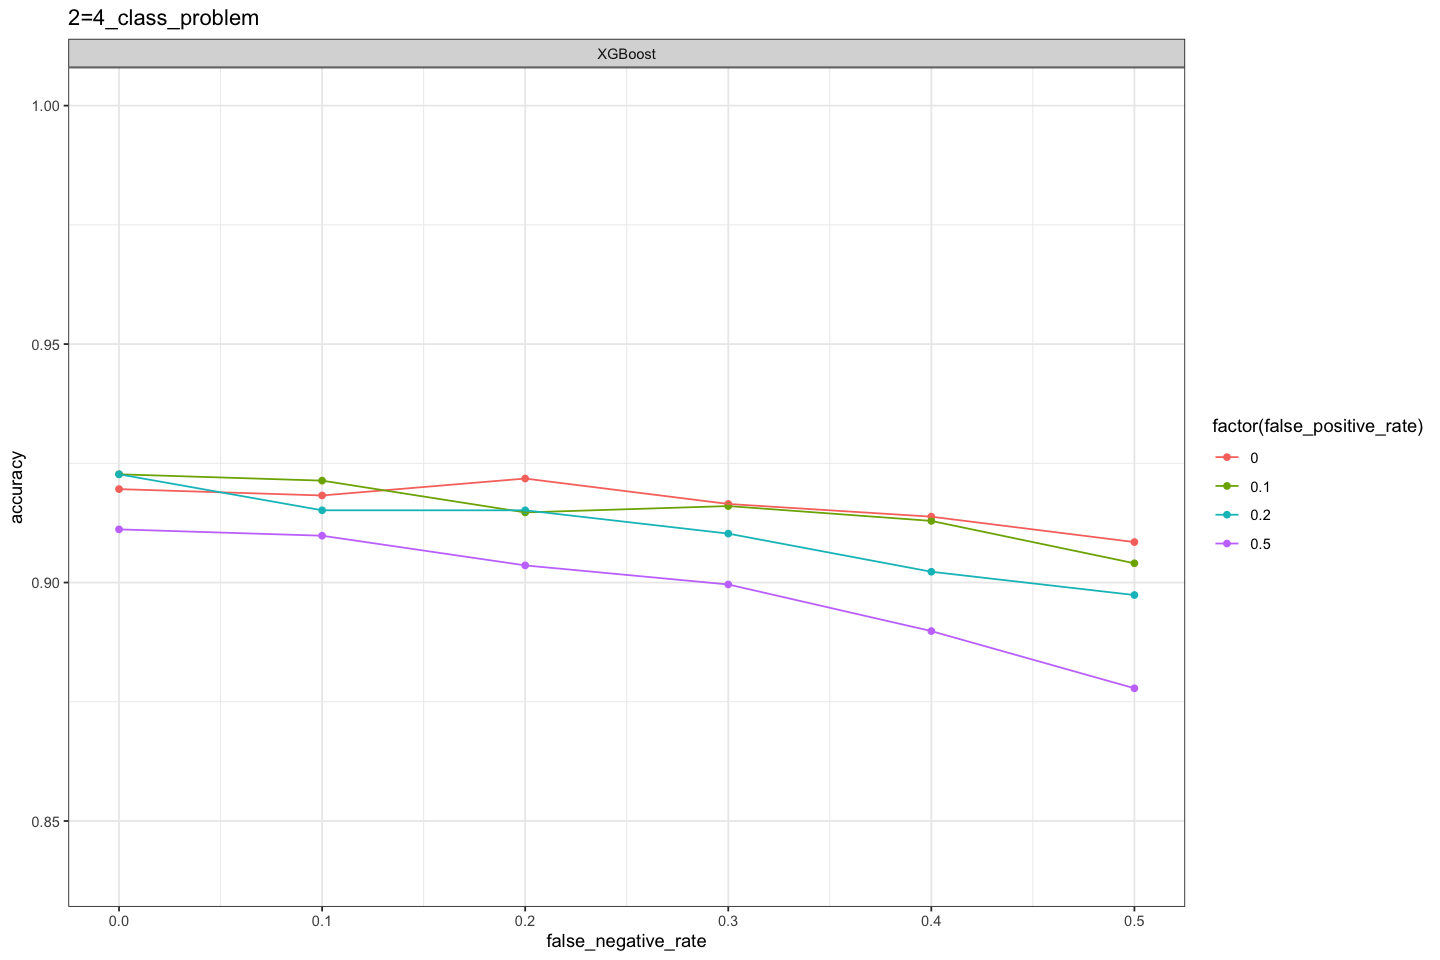

In [26]:
options(repr.plot.width=12, repr.plot.height=8)

for (dataset_name in '2=4_class_problem') {
    print(qplot(data=accuracies[dataset==dataset_name][grep('Isotonic',predictor,invert=T)][grep('Sigmoid',predictor,invert=T)][grep('GaussianNB',predictor,invert=T)][false_positive_rate %in% c(0,0.1,0.2,0.5)], false_negative_rate, accuracy, ylim=c(0.84,1), colour=factor(false_positive_rate), main=dataset_name)+geom_line()+facet_wrap(~predictor))
}

ERROR: Error in library(cvms): there is no package called ‘cvms’
